<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# Support Vector Machine

Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used in classification problems. In 1960s, SVMs were first introduced but later they got refined in 1990. SVMs have their unique way of implementation as compared to other machine learning algorithms. Lately, they are extremely popular because of their ability to handle multiple continuous and categorical variables.

**TABLE OF CONTENTS**

* [1.Support Vector Machine](#Support-Vector-Machine)
* [2.Best SVM](#Best-SVM)  
* [3.References](#References)

# Support Vector Machine

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

In [2]:
pathfile = "../data/df_unido_definitivo.csv"
df = pd.read_csv(pathfile)
df.drop(['Unnamed: 0'], axis = 'columns', inplace = True)
df.head()

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,tot_cur_bal,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_rcnt_rev_tl_op,mort_acc,num_bc_sats,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
0,-1.326914,1.171580,0.899589,0.899572,1.201397,1.645700,0.644953,0.496383,-0.070379,-0.019969,1.965091,0.631600,1.062875,-1.755238,-0.01813,0.064164,-0.606543,0.115178,1.480831,-0.02748,0.187468,-1.027527,2.060082,1.082338,0.365039,0,1.0,0,0,1,1,1,0,0
1,2.544662,-0.387948,-0.261267,-0.261266,-0.377537,-1.726333,-0.032885,0.078142,-0.070379,-0.019969,-0.865870,-0.712643,-0.640442,1.344034,-0.01813,-2.074282,0.095377,-0.846130,-0.588304,-0.02748,-1.629146,1.477403,-0.941155,-0.937646,-0.813058,0,0.0,1,0,0,1,0,0,1
2,-1.326914,0.520515,0.567916,0.567904,-0.377537,0.083051,0.583332,0.458361,-0.070379,-0.019969,0.888317,0.082905,3.599536,-1.235665,-0.01813,-1.544575,-0.606543,1.076486,2.515399,-0.02748,0.685012,-1.106423,1.036430,-0.081818,3.038599,0,1.0,0,0,1,1,0,0,0
3,0.591176,-0.357984,-0.095430,-0.095432,2.780331,-0.410418,-0.156128,0.002098,-0.070379,-0.001552,-0.831107,-0.783683,0.385105,-1.442768,-0.01813,0.064164,-0.415110,-0.846130,0.791119,-0.02748,0.685012,-1.340292,-0.787799,-0.823838,-0.082157,0,1.0,0,0,0,1,0,0,1
4,0.591176,-0.009422,-0.261267,-0.261266,-0.377537,-1.315109,0.151980,0.192208,-0.070379,-0.019969,-0.075423,1.171392,-0.622164,1.020664,-0.01813,-0.347830,-0.478921,-0.365476,-1.278016,-0.02748,-0.472067,1.477403,-0.001468,-0.469185,-0.841910,0,1.0,0,0,1,1,0,0,1


In [3]:
x = df.drop(['loan_status'], axis='columns').values
y = df['loan_status'].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
def conf_matrix(Y_test, Y_pred):
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, with normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

In [6]:
%%time
svclassifier = SVC(max_iter = 1000, kernel = 'rbf')
svclassifier.fit(x_train, y_train)

Wall time: 2min 23s


C:\Users\mario\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=1000)

In [7]:
pred_svm = svclassifier.predict(x_test)

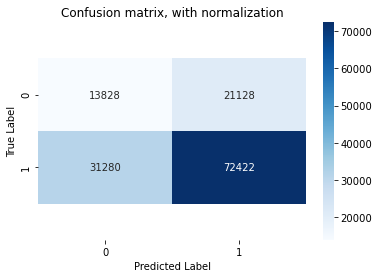

In [8]:
conf_matrix(y_test,pred_svm)

In [9]:
print(classification_report(y_test,pred_svm))

print("Accuracy:", metrics.accuracy_score(y_test, pred_svm)*100, '%')

              precision    recall  f1-score   support

           0       0.31      0.40      0.35     34956
           1       0.77      0.70      0.73    103702

    accuracy                           0.62    138658
   macro avg       0.54      0.55      0.54    138658
weighted avg       0.66      0.62      0.64    138658

Accuracy: 62.20340694370321 %


## Best SVM

In [10]:
%%time
param_test3 = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
gsearch_SVM = GridSearchCV(estimator=SVC(max_iter = 1000),
             param_grid= param_test3 , scoring='roc_auc', n_jobs=-1, iid=False, cv=5)
gsearch_SVM.fit(x_train, y_train)

C:\Users\mario\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Wall time: 8min 41s


C:\Users\mario\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(cv=5, estimator=SVC(max_iter=1000), iid=False, n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             scoring='roc_auc')

In [11]:
gsearch_SVM.best_estimator_

SVC(C=1, kernel='linear', max_iter=1000)

In [12]:
best_svclassifier = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=3, gamma='auto',
                        kernel='linear', max_iter=1000, probability=False, random_state=None,
                        shrinking=True, tol=0.001, verbose=False)

best_svclassifier.fit(x_train, y_train)

C:\Users\mario\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=1, gamma='auto', kernel='linear', max_iter=1000)

In [13]:
best_pred_svm = best_svclassifier.predict(x_test)

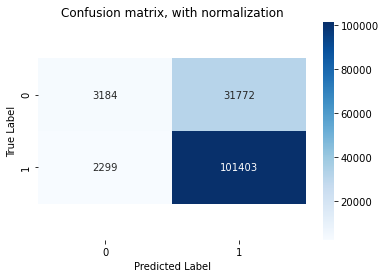

In [14]:
conf_matrix(y_test, best_pred_svm)

In [15]:

print(classification_report(y_test, best_pred_svm))

              precision    recall  f1-score   support

           0       0.58      0.09      0.16     34956
           1       0.76      0.98      0.86    103702

    accuracy                           0.75    138658
   macro avg       0.67      0.53      0.51    138658
weighted avg       0.72      0.75      0.68    138658



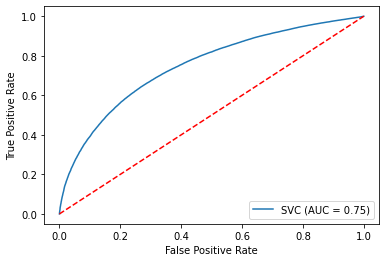

In [19]:
metrics.plot_roc_curve(best_svclassifier, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [16]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [17]:
save_models("../model/support_vector_machine",best_svclassifier)

# References

https://scikit-learn.org/stable/modules/svm.html
